# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense
%matplotlib inline

2024-02-07 01:00:38.001709: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-07 01:00:38.001739: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-07 01:00:38.003027: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-07 01:00:38.009865: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-07 01:00:38.974340: W tensorflow/compiler/tf2

# Загрузка и подготовка данных

Изображения в базе данных MNIST представляют собой квадраты 28 х 28 в градациях серого цвета,
где 0 - черный цвет, 255 - белый.

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Отображение данных

Посмотрим что вообще представляют из себя наши данные

In [3]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Как уже говорилось ранее, один элемент выборки (суть - одна цифра) - это массив размером 28 х 28, 
где каждый элемент этого массива является целым числом, интерпретируемым как градация по шкале серого цвета
от 0 (черный цвет) до 255 (белый цвет).

Тем не менее мы можем вывести графическое представление нашей выборки.
Чтобы лучше понимать с чем мы имеем дело, отобразим первые 25 элементов. 

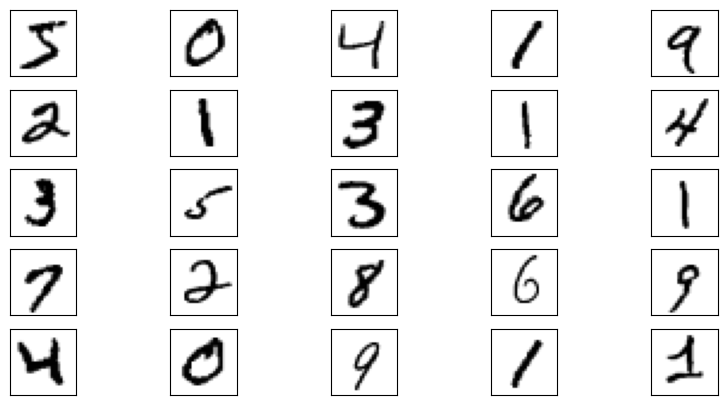

In [4]:
plt.figure(figsize=(10, 5))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)

plt.show()

## Нормализация данных

Разделим каждое значение в данных на 255 (максимально возможное значение)
для того, чтобы привести данные к диапазону [0; 1]

In [5]:
X_train = X_train / 255
X_test = X_test / 255

In [6]:
y_train[0]

5

Таргет представляет собой цифры, соответствующие тому, что нарисовано на картинках.
Но модель будет иметь на выходе 10 нейронов, один из которых будет выдавать 1,
а остальные 0. Т.е. выходом модели будет на самом деле вектор состоящий из 0 и 
одной 1 в позиции, соответствующей цифры. Таким образом модель покажет к какой
категории она отнесла входные данные.

Поэтому нужно преобразовать выходные значения в векторы по категориям

In [7]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [8]:
y_train_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Полносвязная нейронная сеть

## Формирование и компиляция модели

Создадим нейронную сеть со следующими параметрами:
28 х 28 = 784 входа
128 нейронов скрытого слоя, функция активации `ReLu`
10 нейронов выходного слоя (по количеству возможных вариантов цифр), функция активации `softmax`

Но поскольку наши изображения - это массивы 28 х 28, первый слой НС должен 
преобразовывать их в вектор 784 х 1

In [9]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),  # этот слой выполняет преобразование матрицы 28 х 28 в вектор 784 х 1
    Dense(128, activation="relu"),  # полно-связный скрытый слой с 128 нейронами и функцией активации ReLu
    Dense(10, activation="softmax")  # полно-связный выходной слой с 10 нейронами и функцией активации softmax
])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Компиляция модели. 
Для оптимизации алгоритма применим алгоритм `Adam`,
функция потерь - `категориальная кросс-энтропия`,
метрика качества - `accuracy`.

In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Обучение и вывод метрик

Обучения модели. Для собственно обучения используем 80% обучающей выборки, для валидации - 20%

In [11]:
history = model.fit(X_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5


2024-02-07 01:00:41.007241: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


1500/1500 [==============================] - 5s 3ms/step - loss: 0.2870 - accuracy: 0.9175 - val_loss: 0.1519 - val_accuracy: 0.9561
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1271 - accuracy: 0.9634 - val_loss: 0.1220 - val_accuracy: 0.9636
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0884 - accuracy: 0.9729 - val_loss: 0.1059 - val_accuracy: 0.9676
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0664 - accuracy: 0.9796 - val_loss: 0.0877 - val_accuracy: 0.9748
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0494 - accuracy: 0.9852 - val_loss: 0.0935 - val_accuracy: 0.9727


Видим, что потери с каждым прогоном по данным уменьшались, а точность (accuracy) росла.

Построим график.

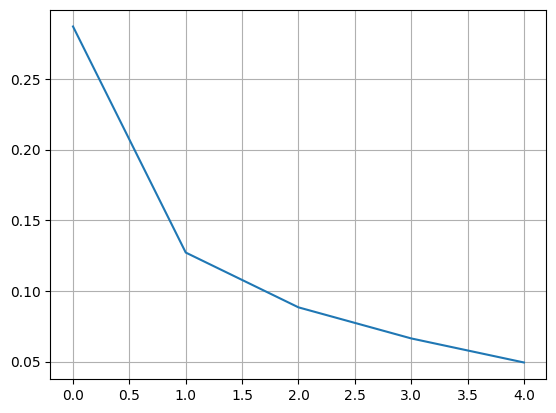

In [12]:
plt.plot(history.history['loss'])
plt.grid(True)
plt.show()

Теперь посмотрим как натренированная модель справится с тестовой выборкой. 

In [13]:
model.evaluate(X_test, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0798 - accuracy: 0.9761


[0.07980558276176453, 0.9761000275611877]

Хороший результат: потери 0.08, точность accuracy 0.97

## Проверка распознавания цифр

1/1 [==============================] - 0s 64ms/step
[[1.8137290e-07 6.0942291e-08 5.1212541e-05 1.4114758e-04 1.0862547e-10
  1.8737921e-07 6.5595779e-11 9.9978262e-01 1.4196702e-06 2.3209854e-05]]
Распознанная цифра: 7


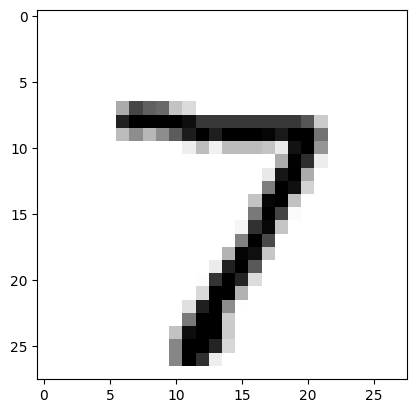

In [14]:
n = 0
res = model.predict(X_test[n].reshape(1, 28, 28))
# Модель выдает вектор с вероятностями по каждому классу. 
# Индекс значения наибольшей вероятности и есть номер класса, суть - распознанная цифра.
print(res)
print(f'Распознанная цифра: {res.argmax()}')  

# Убедимся в правильности распознавания выведя изображение с цифрой
plt.imshow(X_test[n], cmap=plt.cm.binary)
plt.show()

## Выделение неверных вариантов

Посмотрим на каких элементах модель ошиблась. 
Для этого прогоним через модель всю тестовую выборку

In [15]:
pred = model.predict(X_test)  # в результате выполнения получим набор векторов с вероятностями по классам
pred = np.argmax(pred, axis=1)  # переходим к массиву индексов наибольших вероятностей, 
                                # т.е. по сути к массиву предсказанных цифр

313/313 [==============================] - 0s 1ms/step


Значения нейросети - 9
Верное значение - 4


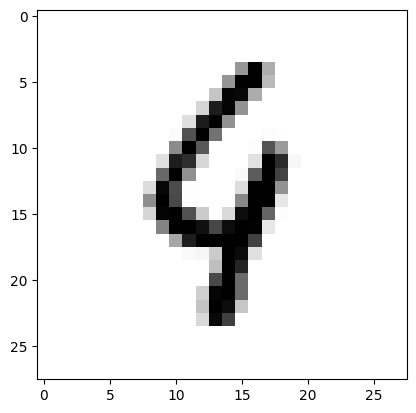

Значения нейросети - 2
Верное значение - 4


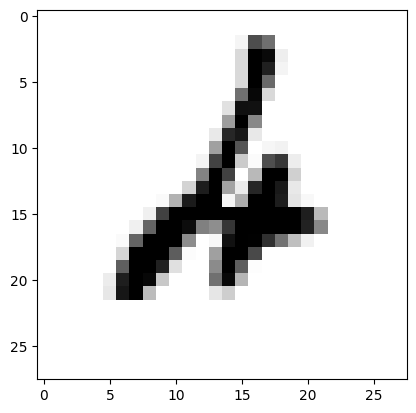

Значения нейросети - 7
Верное значение - 2


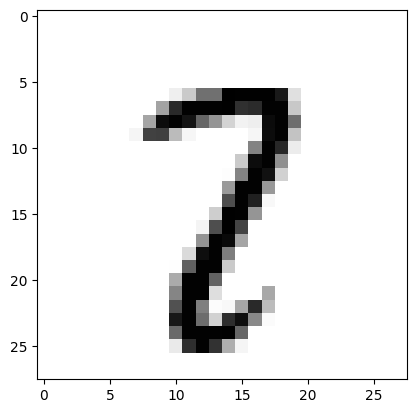

Значения нейросети - 7
Верное значение - 3


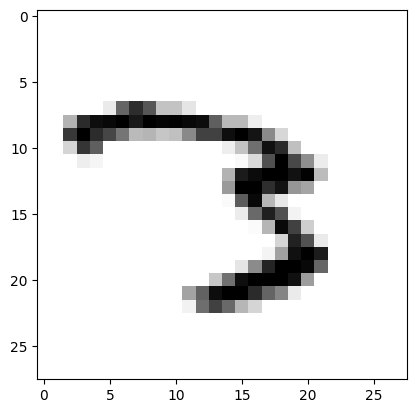

Значения нейросети - 0
Верное значение - 6


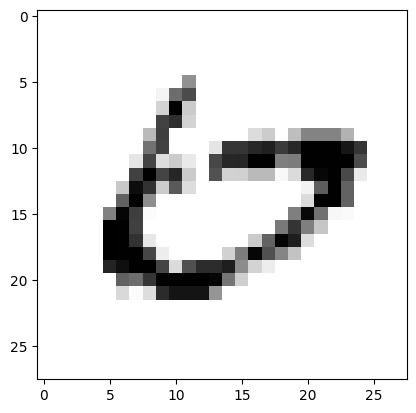

In [16]:
mistakes = (pred != y_test)     # формируем маску для получения неверно предсказанных цифр 

X_false = X_test[mistakes]      # отфильтруем из тестовой выборки те изображения, на которых модель ошиблась
y_false = y_test[mistakes]      # отфильтруем верные значения для этих изображений
pred_false = pred[mistakes]     # отфильтруем ошибочные предсказания

# Выведем на экран первые 5 изображений, на которых модель ошиблась
for i in range(5):
    print(f'Значения нейросети - {pred_false[i]}')
    print(f'Верное значение - {y_false[i]}')
    plt.imshow(X_false[i], cmap=plt.cm.binary)
    plt.show()